In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [117]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Checking for the null values

In [119]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### let's handle the Null values

In [120]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [121]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

##### Dropping the cabin column since it has more than 75% null values

In [122]:
data=data.drop(columns=['Cabin'])

##### Dropping the Name column and PassengerID (unique in nature)

In [123]:
data=data.drop(columns=['Name','PassengerId'],axis=1)

In [124]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


#### Encoding the columns

In [125]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [129]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [130]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=LE.fit_transform(data[i])

In [131]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,2
1,1,1,0,38.000000,1,0,596,71.2833,0
2,1,3,0,26.000000,0,0,669,7.9250,2
3,1,1,0,35.000000,1,0,49,53.1000,2
4,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2
887,1,1,0,19.000000,0,0,14,30.0000,2
888,0,3,0,29.699118,1,2,675,23.4500,2
889,1,1,1,26.000000,0,0,8,30.0000,0


In [132]:
data.isna().sum().sum()

0

#### Describe the Data set

In [133]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


In [134]:
missing=np.where(data['Fare']==0.0)

In [135]:
missing

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

#### Handling the 0 Values in Fare column

In [136]:
data['Fare']=data['Fare'].replace(0.0,data['Fare'].mean())

In [137]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.746366,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.514272,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.925000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,15.100000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,32.204208,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


#### let's Visualize the Continuous columns

<AxesSubplot:xlabel='Age', ylabel='Density'>

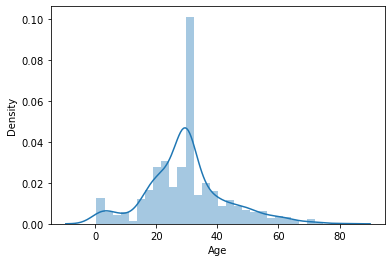

In [138]:
sns.distplot(data['Age'],kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

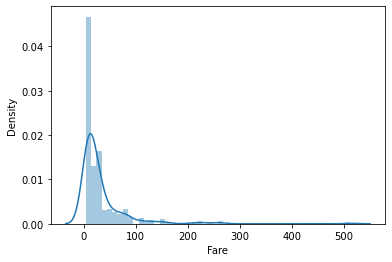

In [139]:
sns.distplot(data['Fare'],kde=True)

<AxesSubplot:>

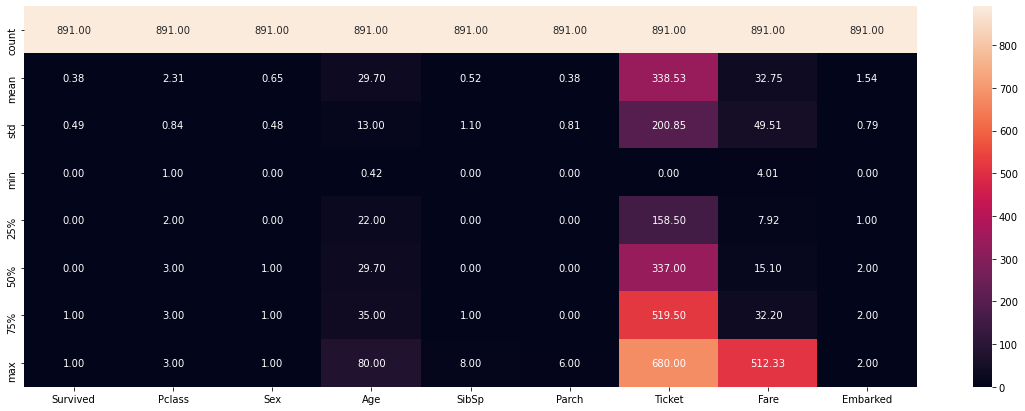

In [140]:
plt.figure(figsize=(20,7))
sns.heatmap(data.describe(),annot=True,fmt="0.2f")

#### Correlation of the features with the target column

In [141]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.251092,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.556409,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.174911,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.094039,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.155030,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.211818,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.020532,-0.001729
Fare,0.251092,-0.556409,-0.174911,0.094039,0.155030,0.211818,-0.020532,1.000000,-0.219113
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.219113,1.000000


<AxesSubplot:>

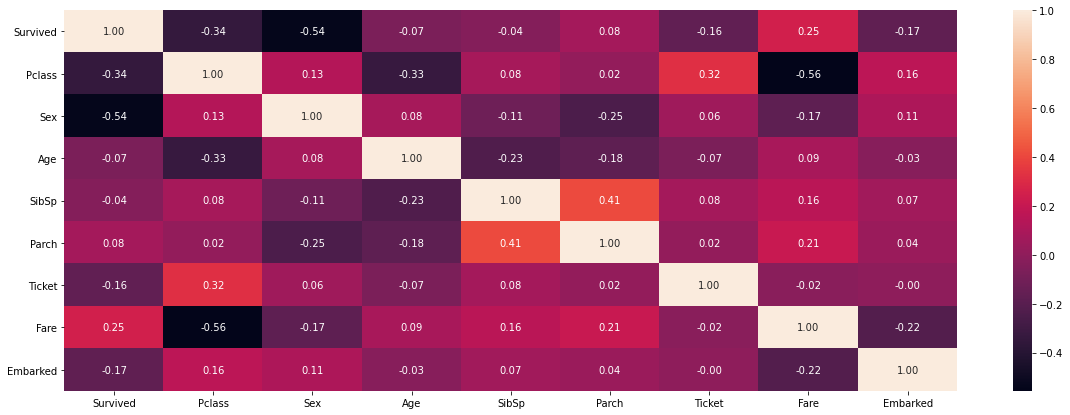

In [142]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")

#### Checking the columns which are positively and negatively correlated with the target variable

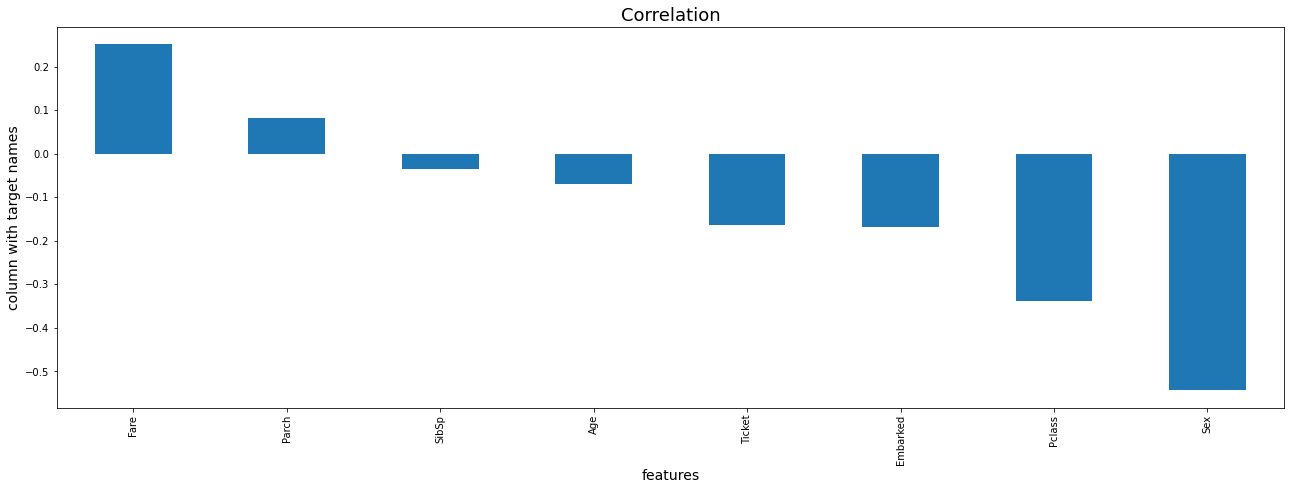

In [143]:
plt.figure(figsize=(22,7))
data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Checking for Outliers

<AxesSubplot:>

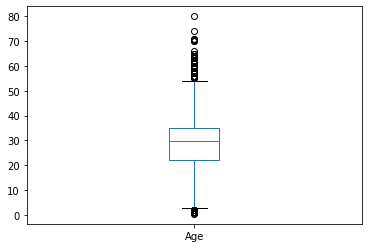

In [144]:
data['Age'].plot.box()

<AxesSubplot:>

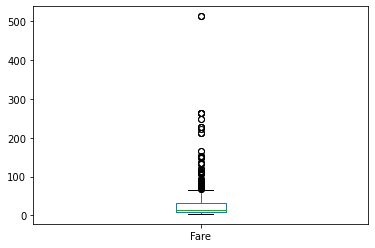

In [145]:
data['Fare'].plot.box()

#### Outlier removal using zscore

In [146]:
from scipy.stats import zscore

In [147]:
z=np.abs(zscore(data))

In [148]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 7, 4, 4, 4, 4, 5, 7, 3, 3, 7, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        7, 4, 4, 4, 7, 7, 4, 7, 5, 7, 7, 4, 5, 5, 7, 4, 3, 7, 4, 4, 7, 5,
        5, 3, 5, 3, 5, 7, 4, 4, 7, 7, 7, 7, 5, 7, 7, 3, 5, 7, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [149]:
data_new=data[(z<3).all(axis=1)]

<AxesSubplot:>

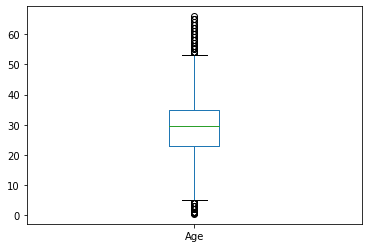

In [150]:
data_new['Age'].plot.box()

<AxesSubplot:>

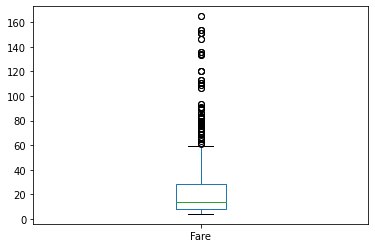

In [151]:
data_new['Fare'].plot.box()

In [152]:
data_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,2
1,1,1,0,38.000000,1,0,596,71.2833,0
2,1,3,0,26.000000,0,0,669,7.9250,2
3,1,1,0,35.000000,1,0,49,53.1000,2
4,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2
887,1,1,0,19.000000,0,0,14,30.0000,2
888,0,3,0,29.699118,1,2,675,23.4500,2
889,1,1,1,26.000000,0,0,8,30.0000,0


### Skewness

In [153]:
data_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Ticket      0.039240
Fare        2.318368
Embarked   -1.277386
dtype: float64

In [154]:
data_new.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.390244,2.310976,0.657317,29.792831,0.348780,0.254878,331.578049,26.425152,1.540244
std,0.488103,0.826678,0.474896,12.151418,0.619434,0.565308,201.150676,29.618491,0.788866
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,151.750000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,331.500000,13.458350,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,507.250000,28.553125,2.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,680.000000,164.866700,2.000000


Since the age can be 80 and the fare can be above 500 so we are not removing the ouliers

### Dividing the Dataset into dependent and independent variable

In [155]:
x=data.drop(columns=['Survived'])
y=data['Survived']

In [156]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.000000,1,0,523,7.2500,2
1,1,0,38.000000,1,0,596,71.2833,0
2,3,0,26.000000,0,0,669,7.9250,2
3,1,0,35.000000,1,0,49,53.1000,2
4,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,101,13.0000,2
887,1,0,19.000000,0,0,14,30.0000,2
888,3,0,29.699118,1,2,675,23.4500,2
889,1,1,26.000000,0,0,8,30.0000,0


In [157]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Scaling of data

In [158]:
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new

array([[ 0.82737724,  0.73769513, -0.5924806 , ...,  0.91896631,
        -0.51521884,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ...,  1.28262456,
         0.77873663, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ...,  1.64628282,
        -0.50157875,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  1.67617254,
        -0.18785669,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -1.64656796,
        -0.05549731, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ...,  0.63501397,
        -0.50511507, -0.67817453]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [159]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.949196,Pclass
1,1.109309,Sex
2,1.210670,Age
3,1.282759,SibSp
4,1.323161,Parch
5,1.170212,Ticket
6,1.720751,Fare
7,1.077330,Embarked


All the VIF values are less than 5 and are very low.That means no multicollinearity.

### Finding the best random state

In [160]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.8789237668161435 on Random State  150


### Splitting data Into Training and test data

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=150)

### Logistic Regression

In [162]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

87.89237668161435
[[99 35]
 [59 30]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       134
           1       0.46      0.34      0.39        89

    accuracy                           0.58       223
   macro avg       0.54      0.54      0.53       223
weighted avg       0.56      0.58      0.56       223



### DecisionTree Classifier

In [163]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  83.85650224215246
[[118  16]
 [ 20  69]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       134
           1       0.81      0.78      0.79        89

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



### Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  85.65022421524664
[[124  10]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       134
           1       0.87      0.75      0.81        89

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.85       223



### SVC

In [165]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  88.78923766816143
[[128   6]
 [ 19  70]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       134
           1       0.92      0.79      0.85        89

    accuracy                           0.89       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223



Logistic Regression  and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

#### Cross Validation

In [166]:
from sklearn.model_selection import cross_val_score
cvs_LR=cross_val_score(LR,x_new,y,cv=5)

In [167]:
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.7878852551628899


In [168]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.7766367459669825


In [169]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.8316678174628084


In [170]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.8204193082669009


Random Forest is Performing better among all so we will continue with Random forest classifier

### Hyper Parameter Tuning

In [174]:
# Creating parameter list for passing in GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion':['gini','entropy'],
            'random_state':list(range(0,10))}

In [175]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) # Fitting the data in the model
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'random_state': 7}

In [176]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8609865470852018

#### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

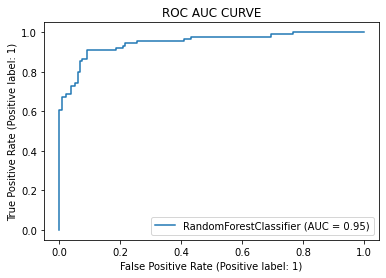

In [177]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

#### Saving the model in pickel

In [179]:
import pickle
filename='titanic_model.pickle'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))